<a href="https://colab.research.google.com/github/Roll1ngo/Authorization_and_authentication_synopsis/blob/master/Hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1npceVuDsvVpeYJEUA1558uD_JmqTpQhm' -O data.csv

--2024-06-14 13:03:54--  https://docs.google.com/uc?export=download&id=1npceVuDsvVpeYJEUA1558uD_JmqTpQhm
Resolving docs.google.com (docs.google.com)... 74.125.134.139, 74.125.134.102, 74.125.134.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1npceVuDsvVpeYJEUA1558uD_JmqTpQhm&export=download [following]
--2024-06-14 13:03:54--  https://drive.usercontent.google.com/download?id=1npceVuDsvVpeYJEUA1558uD_JmqTpQhm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.216.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540286 (2.4M) [application/octet-stream]
Saving to: ‘data.csv’

data.csv            100%[===================>]   2.42M  --.-KB/s    in 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Class markers

*   Idle = **0**
*   Running = **1**
*   Stairs =**2**
*   Walking = **3**





In [ ]:
data  = pd.read_csv('data.csv')
data

,accelerometer_X,accelerometer_Y,accelerometer_Z,class_marker
0,-0.124498,-0.162806,9.782708,0
1,-0.138864,-0.124498,9.768343,0
2,-0.095768,-0.129287,9.773131,0
3,-0.114922,-0.134075,9.782708,0
4,-0.114922,-0.134075,9.744401,0
...,...,...,...,...
73375,6.368577,-14.944607,-2.379836,3
73376,1.110910,-10.256760,-4.702212,3
73377,-0.397437,-12.133814,-1.086968,3
73378,-3.150769,-1.230620,4.007894,3


In [ ]:
data.shape

(73380, 4)

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,accelerometer_X,accelerometer_Y,accelerometer_Z,class_marker
0,4.127604,23.027431,5.181053,1
1,2.853889,-10.012551,-0.411803,2
2,4.534618,6.986281,-1.881842,1
3,-0.737414,-2.801216,0.933739,3
4,0.282516,-0.014365,9.782708,0
...,...,...,...,...
6971,-5.865794,18.899828,-0.603339,1
6972,1.479617,-9.251195,-0.857124,2
6973,-1.857900,-4.376600,2.327164,2
6974,5.133168,-10.261548,-0.847547,2


# Баланс класів

<Axes: xlabel='class_marker'>

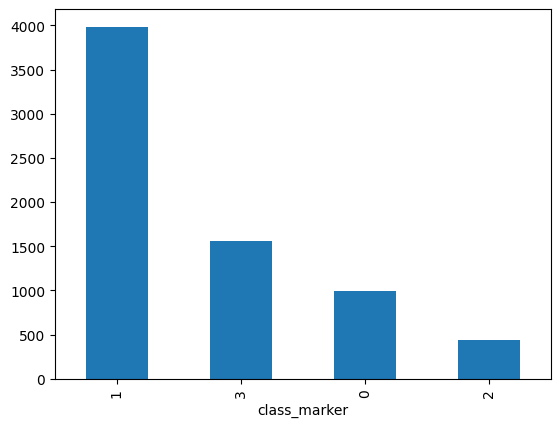

In [ ]:
data['class_marker'].value_counts().plot(kind='bar')

Характер росподілення класів

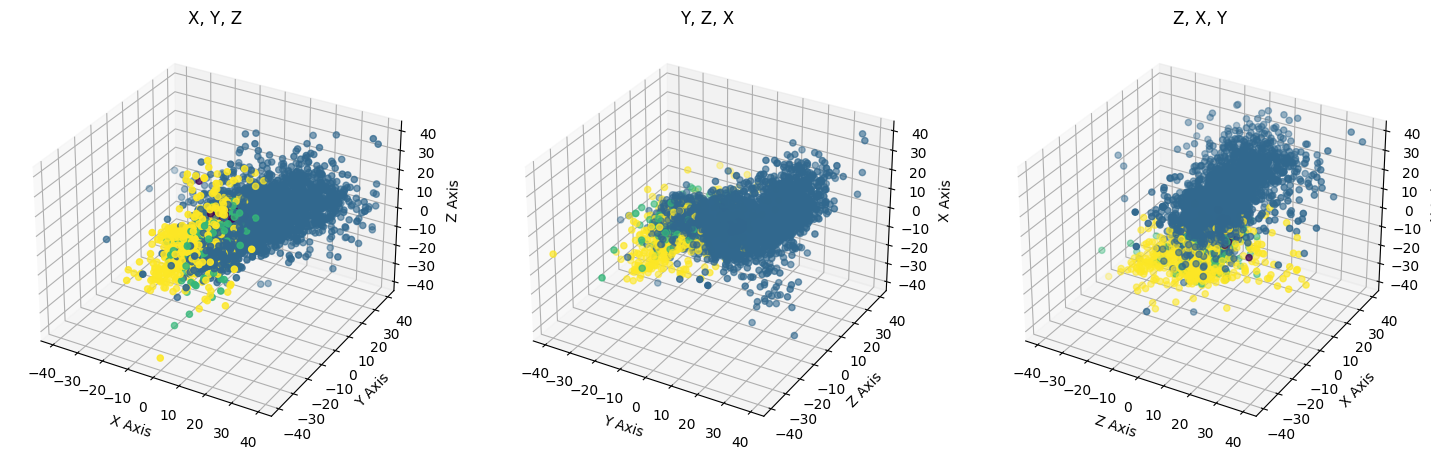

In [ ]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(data['accelerometer_X'], data['accelerometer_Y'],
            data['accelerometer_Z'], c=data['class_marker'], cmap='viridis')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')
ax1.set_zlabel('Z Axis')
ax1.set_title('X, Y, Z')


ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(data['accelerometer_Y'], data['accelerometer_Z'],
            data['accelerometer_X'], c=data['class_marker'], cmap='viridis')
ax2.set_xlabel('Y Axis')
ax2.set_ylabel('Z Axis')
ax2.set_zlabel('X Axis')
ax2.set_title('Y, Z, X')


ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(data['accelerometer_Z'], data['accelerometer_X'],
            data['accelerometer_Y'], c=data['class_marker'], cmap='viridis')
ax3.set_xlabel('Z Axis')
ax3.set_ylabel('X Axis')
ax3.set_zlabel('Y Axis')
ax3.set_title('Z, X, Y')

plt.show()


# Підбираєм найкрайщі параметри для RBF

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
x = data.drop(columns=['class_marker'])
y = data['class_marker']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svc_rbf = SVC(kernel='rbf')

p_grid_rbf = {
    'C': [1,10,100],
    'gamma':[ g/10 for g in range(1,11)],
    }
cv_rbf = KFold(n_splits=4, shuffle=True, random_state=42)
clf_rbf = GridSearchCV(estimator=svc_rbf, param_grid=p_grid_rbf, cv=cv_rbf, verbose=2)
clf_rbf.fit(X_train,y_train)
print("Best parameters found: ", clf_rbf.best_params_)
#Best parameters found:  {'C': 1, 'gamma': 0.1}

Тренуємо модель на найкращіх параметрах

In [ ]:
#Best parameters found:  {'C': 1, 'gamma': 0.1}
best_svc_rbf= SVC(C=1, gamma=0.1).fit(X_train, y_train)
y_pred_rbf = best_svc_rbf.predict(X_test)

In [73]:
pred_data = pd.DataFrame({'predict':y_pred_rbf, 'real': y_test})
pred_data['right'] = pred_data['real'] == pred_data['predict']
pred_data.reset_index(drop=True)

,predict,real,right
0,1,1,True
1,1,1,True
2,3,3,True
3,3,1,False
4,1,1,True
...,...,...,...
1391,1,1,True
1392,0,0,True
1393,1,1,True
1394,1,1,True


# Дивимось окремі метрики


## Analytical accuracy

In [74]:
pred_data['right'].sum() /pred_data.shape[0]

0.8567335243553008

## Sklearn accuracy

In [75]:
accuracy_svс = accuracy_score(pred_data['real'], pred_data['predict'])
accuracy_svс.round(2)

0.86

## Sklearn precision

In [77]:
precision_svс = precision_score(pred_data['real'], pred_data['predict'],average='macro')
precision_svс.round(2)

0.68

## Sklearn recall

In [78]:
recall_svс = recall_score(pred_data['real'], pred_data['predict'], average='macro')
recall_svс.round(2)

0.68

## f1_score

In [ ]:
f1_score_svс = f1_score(pred_data['real'], pred_data['predict'], average='macro')
f1_score_svс

Дивимось звіт

In [ ]:
metrics_svc= classification_report(y_test, y_pred_rbf, zero_division=1, output_dict=True)
report_svc= pd.DataFrame(metrics_svc).transpose()
report_svc.round(2)

,precision,recall,f1-score,support
0,0.98,1.00,0.99,200.00
1,0.88,0.93,0.91,823.00
2,0.12,0.01,0.02,82.00
3,0.72,0.80,0.76,291.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.68,0.68,0.67,1396.00
weighted avg,0.82,0.86,0.83,1396.00


# Дерево рішень

Підбираємо параметри

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,5, 10, 20, 30],
    'min_samples_split': [2, 10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

dtc = DecisionTreeClassifier()
cv_tree = KFold(n_splits=5, shuffle=True, random_state=36)

gs_tree = GridSearchCV(estimator=dtc, param_grid=param_grid,
                       cv=cv_tree, n_jobs=-1, verbose=2)
gs_tree.fit(X_train, y_train)

print("Найкращі параметри: ", gs_tree.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Найкращі параметри:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
pred_tree = gs_tree.predict(X_test)

Дивимось метрики

In [ ]:
metrics_tree = classification_report(y_test, pred_tree, zero_division=1, output_dict=True)
report_tree= pd.DataFrame(metrics_tree).transpose()
print(display(report_tree.round(2)))

,precision,recall,f1-score,support
0,0.94,0.98,0.96,200.00
1,0.90,0.91,0.91,823.00
2,1.00,0.00,0.00,82.00
3,0.70,0.84,0.77,291.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.88,0.68,0.66,1396.00
weighted avg,0.87,0.85,0.83,1396.00


None


Порівнюєм результати

In [ ]:
print(display(report_tree.round(2)), display(report_svc.round(2)))

,precision,recall,f1-score,support
0,0.94,0.98,0.96,200.00
1,0.90,0.91,0.91,823.00
2,1.00,0.00,0.00,82.00
3,0.70,0.84,0.77,291.00
accuracy,0.85,0.85,0.85,0.85
macro avg,0.88,0.68,0.66,1396.00
weighted avg,0.87,0.85,0.83,1396.00


,precision,recall,f1-score,support
0,0.98,1.00,0.99,200.00
1,0.88,0.93,0.91,823.00
2,0.12,0.01,0.02,82.00
3,0.72,0.80,0.76,291.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.68,0.68,0.67,1396.00
weighted avg,0.82,0.86,0.83,1396.00


None None


Відмальовуємо графіки порівняння

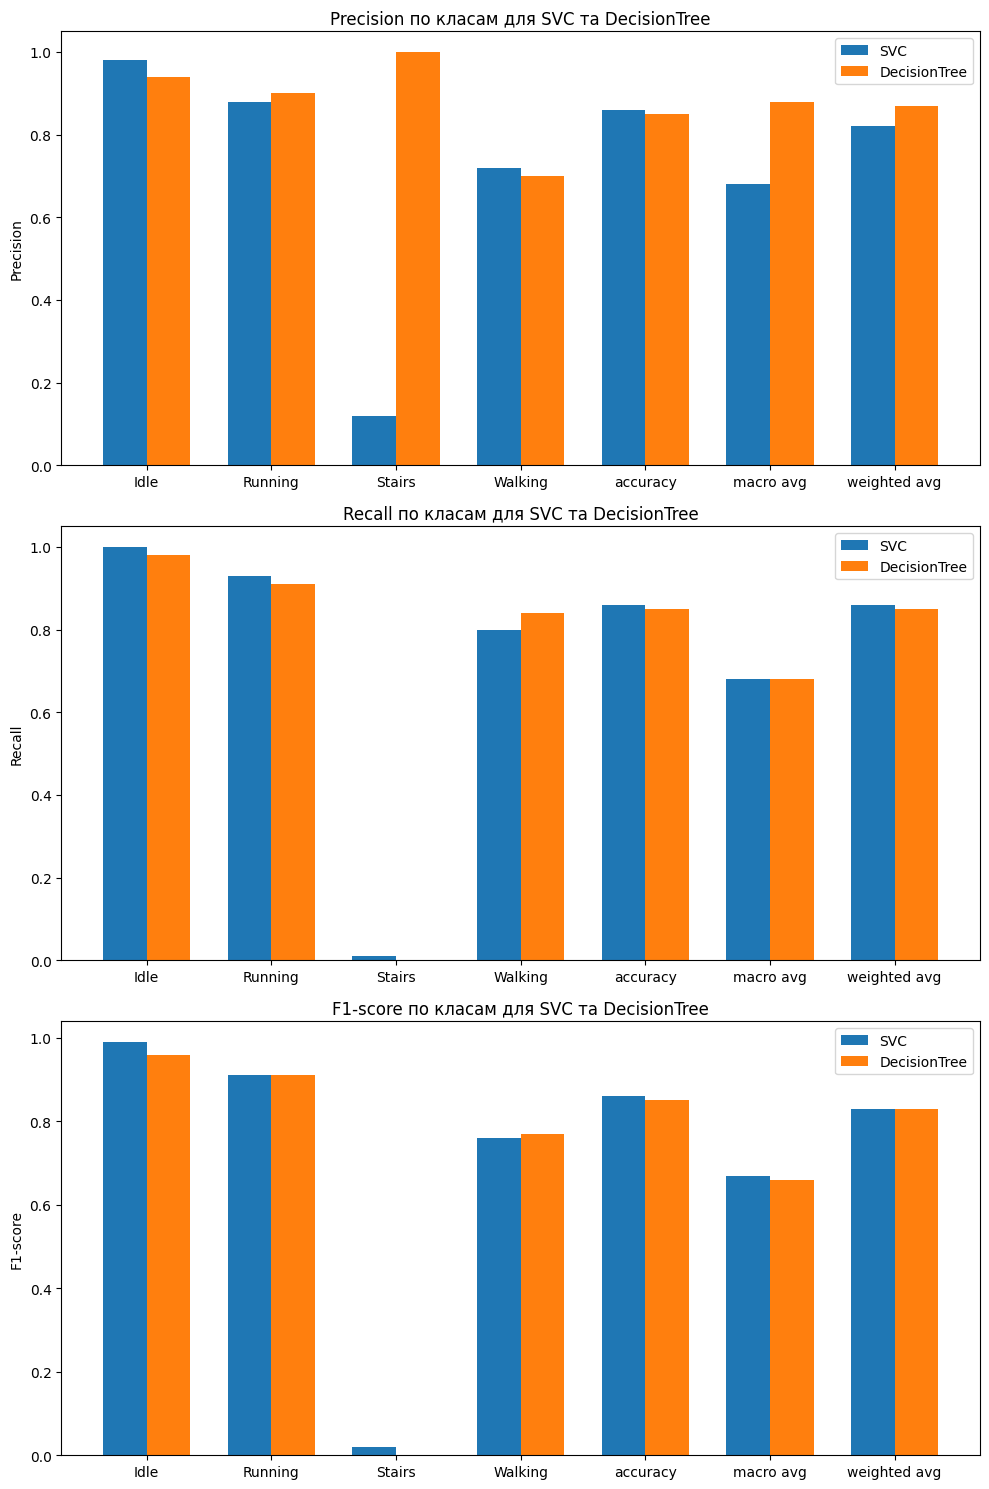

In [ ]:

labels = ['Idle', 'Running', 'Stairs', 'Walking', 'accuracy', 'macro avg', 'weighted avg']

svc_precision = report_svc['precision'].round(2)
tree_precision = report_tree['precision'].round(2)

svc_recall = report_svc['recall'].round(2)
tree_recall = report_tree['recall'].round(2)

svc_f1 = report_svc['f1-score'].round(2)
tree_f1 = report_tree['f1-score'].round(2)

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Побудова графіку для precision
rects1 = ax[0].bar(x - width/2, svc_precision, width, label='SVC')
rects2 = ax[0].bar(x + width/2, tree_precision, width, label='DecisionTree')

ax[0].set_ylabel('Precision')
ax[0].set_title('Precision по класам для SVC та DecisionTree')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Побудова графіку для recall
rects1 = ax[1].bar(x - width/2, svc_recall, width, label='SVC')
rects2 = ax[1].bar(x + width/2, tree_recall, width, label='DecisionTree')

ax[1].set_ylabel('Recall')
ax[1].set_title('Recall по класам для SVC та DecisionTree')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

# Побудова графіку для f1-score
rects1 = ax[2].bar(x - width/2, svc_f1, width, label='SVC')
rects2 = ax[2].bar(x + width/2, tree_f1, width, label='DecisionTree')

ax[2].set_ylabel('F1-score')
ax[2].set_title('F1-score по класам для SVC та DecisionTree')
ax[2].set_xticks(x)
ax[2].set_xticklabels(labels)
ax[2].legend()

fig.tight_layout()

plt.show()

Дуже схожі метрики. Явна проблема с даними для 2 класу(Stairs)